##
# Jupyter Mini-Crash Course: Biowulf, R vs. Python, and Swarms
- **Written By:** Mary B. Makarious and Hirotaka Iwaki 
- **Last Updated:** 01.08.2019
- **Written In:** Python 3.7 (Check to see the kernel on the top right!)

## Introduction

**Reproducibility** is the key to robust science. Keeping your code in a way that anybody can trace what you have done is important. 

**Jupyter Notebook** is an efficient tool for sharing your analysis in a reproducible form. Another advantage of using jupyter notebook is that you can utilize the power of Biowulf so that you can adapt many techniques to **accerelate your analyses**.
As trial-and-error is necessary for scripting, spinning this cycle as fast as possible is critical. 

**What is Jupyter?** The name Jupyter is an indirect acronym of the three core languages it was designed for: **JU**lia, **PYT**hon, and **R** and is inspired by the planet Jupiter.

A previous summer student created a neat mini-intro to Jupyter as a whole that you can find [here](https://github.com/neurogenetics/seminar/blob/master/Examples%20and%20Tutorials/NotebooksTutorial.ipynb)

## What We Will Cover Today
#### [0. Files and Logistics](#Files)
#### [1. Benefits to Using Jupyter Notebooks/Lab](#Getting-Started)
#### [2. Setting Up *expect* Scripts](#Setting-Up)
 - 2.1) Running Scripts and Setting Up Interactive Nodes

#### [3. Incorporating R, bash, and Other Languages](#Dif-Lang)
 - 3.1) Running bash and a bash loop
 - 3.2) Running R 
 
#### [4. Common R Functions in Python](#R-Python)

#### [5. How to plot in R with ggplot within the Lab/Notebook](#R-Plot)
#### [6. How to plot in Python with seaborn within the Lab/Notebook](#Py-Plot)
#### [7. How to Submit Swarm Files to Biowulf from within the Lab/Notebook](#Swarms)
#### [8. Take-away Messages](#Bye)
---

<a id="Files"></a>
# 0. Files and Logistics

**GitHub Repository:** https://github.com/neurogenetics/talks/tree/master/JupyterSeminar2019

Throughout this seminar, we will be using dummy data for demonstration.

## If you plan on using your own Biowulf account...
1. Follow the link on the screen
2. Download the .zip file 
3. Copy over the data to your desired directory on Biowulf (locally)
 - `scp -r /downloaded/file/file.zip yourBiowulfusername@biowulf.nih.gov:/desired/directory/here` 
4. `gunzip` the file 

## If you plan on using one of the student accounts...
1. Password: On handout
2. I have already made a directory called `JupyterSeminar2019` with all the materials needed
3. When the time comes, you will `cd` into that directory. 

These zip files contain only the **data** we will be using. 
In Module 2, we will be generating our own scripts, not included in the zip file/directory already

---

<a id="Getting-Started"></a>
# 1. Benefits to Using Jupyter Notebooks/Lab

- Saves all the output within the notebook! 
    - This includes plots, outcomes of shell scripts, etc.
- Run in chunks -- which is good for troubleshooting 
- Can include Markdown chunks
    - This is a markdown chunk!
    - These are great for explaining what's going on, giving a structure to documentation, and replication later
- Can run chunks of different languages 
 - R, bash, Julia, Python, and many more outlined [here](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)!
- Can generate presentation slides directly from the notebook 
- Can generate an HTML or PDF that is shareable 
    - These include all the outputs that you see as well, beneficial for replication 
- In JupyterLab: Can have a Terminal window open as well in the same environment 

## Limitations:
- When running Jupyter on Biowulf, it is like running anything else. You are limited to the packages that are preinstalled in the kernel.
- Should you need additional packages, `!pip install` and `conda install` are not available (and would need to look into making your own environment to do so) 
---

<a id="Setting-Up"></a>
# 2. Setting Up *expect* Scripts

2 scripts are necessary to start a Jupyter notebook in Biowulf, which will be saved as `first.txt` and `second.txt`.

These 2 files will be saved somewhere on your Desktop and will be accessed via the terminal.

For both of these scripts, you will **need to change** the username to be your own username when you make them.

Paste the following chunk into a text file that you will name `first.txt`

```bash 
# Set user name
set USER yourBiowulfusernamehere

# grab the password 
stty -echo
send_user -- "Password for ${USER}@biowulf.nih.gov: "
expect_user -re "(.*)\n"
send_user "\n"
stty echo
set PASS $expect_out(1,string)

# Login and set up interactive node
set timeout -1
spawn env LANG=C /usr/bin/ssh ${USER}@biowulf.nih.gov
expect {
    "${USER}@biowulf.nih.gov's password: " {
        send "${PASS}\n"
    }
}
expect {
    "\\\$" {
        send "module load tmux;tmux\n"
    }
}
expect {
    "\\\$" {
        send "sinteractive --tunnel --cpus-per-task=2 --mem=200g --gres=lscratch:200 --time=13:00:00\n"
    }
}

# Write out the allocated port, install modules frequently used, and set up jupyterLab
## you may like to go to a different directory before setting up the jupyter lab
expect {
    "\\\$" {
        send "echo \${PORT1} > sinteractive_port.txt; \
        module load R; \
        cd /data/${USER}; \
        module load annovar; \
        module load plink; \
        module load flashpca; \
        module load jupyter;jupyter lab --ip localhost --port \${PORT1} --no-browser\n"
    }
}
interact

```

Now, paste the next chunk as `second.txt`

```bash
# User name 
set USER yourBiowulfusernamehere

# grab the password 
stty -echo
send_user -- "Password for ${USER}@biowulf.nih.gov: "
expect_user -re "(.*)\n"
send_user "\n"
stty echo
set PASS $expect_out(1,string)

# Download port information for sinteractive node
spawn scp ${USER}@biowulf.nih.gov:/home/${USER}/sinteractive_port.txt .
expect {
    "${USER}@biowulf.nih.gov's password: " {
        send "${PASS}\n"
    }
}
expect {"\\\$"} # Wait until the download finishes

# Tunnel to the sinteractive node
set NODE [exec cat sinteractive_port.txt]
spawn /usr/bin/ssh -L ${NODE}:localhost:${NODE} biowulf.nih.gov
expect {
    "${USER}@biowulf.nih.gov's password: " {
        send "${PASS}\n"
    }
}
interact
```

---
.
## 2.1 Running *expect* Scripts to Login and Tunnel to the `sinteractive` node

After creating the above `.txt` files, run the first command (that is saved somewhere on your local computer) and wait until sinteractive node is set up

`expect first.txt`

Open a new Terminal window, and run the second command

`expect second.txt`
    
Great! Now we can connect to Jupyter!
If you go back to the Terminal with the interactive node, there should be a path that looks like the following 

`http://localhost:37674/?token=123456789123456789`

Go ahead highlight this, right click, and open URL. This should open in your default web browser

### Notes: 
1. You need to customize your `first.txt` as needed for modules you want to include or home directory you want to start in
 - (For example, I assume that the list of software you frequently use is different from mine.)
2. In the `first.txt` script, we use tmux
 - Because with tmux, we don’t need to set up sinteractive node after every incidental disconnection
 - We just run the `second.txt` and resume our analysis. It saves a lot of time when we are working wirelessly or remotely
 
 # Let's Try This Out!

---
<a id="Dif-Lang"></a>
# 3. Incorporating R, bash, and Other Languages 

.
### 3.1 Bash

### Things to Keep in Mind:
- The beginning of the chunk needs to start with `%%bash`
- You can make variables and arrays like you normally would, but everything is contained in the chunk and will not transfer over
- You can save output from a bash script to use in a Python chunk later using (!)

In [5]:
%%bash

# You can assign variables
VAR1=2 
echo "${VAR1}"
echo ""

# You can also perform loops 
for chromosome in {1..22}
do
    echo "Processing chromosome "$chromosome
    # your script here
done

2

Processing chromosome 1
Processing chromosome 2
Processing chromosome 3
Processing chromosome 4
Processing chromosome 5
Processing chromosome 6
Processing chromosome 7
Processing chromosome 8
Processing chromosome 9
Processing chromosome 10
Processing chromosome 11
Processing chromosome 12
Processing chromosome 13
Processing chromosome 14
Processing chromosome 15
Processing chromosome 16
Processing chromosome 17
Processing chromosome 18
Processing chromosome 19
Processing chromosome 20
Processing chromosome 21
Processing chromosome 22


In [6]:
# You can mix and match Python and bash
x = 1

if x is not 1:
    print('x is not 1')
else:
    print('x is 1')

# You can read in input from the terminal to use in Python
# Using !, you can incorporate the results from Terminal into your Python scripts
y = !echo "Yes"
print(y)

x is 1
['Yes']


.
### 3.2 R

### Things to Keep in Mind:
- The beginning of the chunk needs to start with `%%bash`, same as before. But will also have the following line: `R --slave --vanilla`
- Everything contained in the chunk will not be transferred over, same as before 
 - Though, you can look into the `%%Rpush` and `%%Rpull` documentation if you are interested in transferring things between Python and R

In [7]:
%%bash
# Managing data in R with tidyverse and data.table
R --slave --vanilla # options for running R

# Load the necessary packages 
suppressMessages(library('tidyverse'))
suppressMessages(library('data.table'))

# Read in the .fam file (from example PLINK data)
fam <- fread("hapmap1.fam", header = FALSE)

# See the first few lines 
head(fam)

# Get the dimensions of the dataset
dim(fam)

# Add column names to the dataset
colnames(fam)<- c("FID", "IID", "PAT", "MAT", "SEX", "PHENO")

# Change a column name 
fam_rename <- fam %>% rename("PHENOTYPE" = "PHENO") # Can be done in place
head(fam_rename)

# Make a new column (print out if case or control)
fam_rename$CASE_OR_CONTROL <- ifelse(fam_rename$PHENOTYPE == 1, "CONTROL", "CASE")
head(fam_rename)

# Subset the data
fam_cases = fam_rename %>% filter(CASE_OR_CONTROL == "CASE")
head(fam_cases)
dim(fam_cases)

# Write out the file 
write.table(fam_cases, file = "updated_fam_file_R.csv", col.names=FALSE, row.names=FALSE, na="", quote=FALSE, sep="\t")

# Loop
x <- c(2,5,3,9,8,11,6)

# For loop
count <- 0
for (value in x) {
    if(value %% 2 == 0)
    count = count+1
}
print(count)

       V1 V2 V3 V4 V5 V6
1: HCB181  1  0  0  1  1
2: HCB182  1  0  0  1  1
3: HCB183  1  0  0  1  2
4: HCB184  1  0  0  1  1
5: HCB185  1  0  0  1  1
6: HCB186  1  0  0  1  1
[1] 89  6
      FID IID PAT MAT SEX PHENOTYPE
1: HCB181   1   0   0   1         1
2: HCB182   1   0   0   1         1
3: HCB183   1   0   0   1         2
4: HCB184   1   0   0   1         1
5: HCB185   1   0   0   1         1
6: HCB186   1   0   0   1         1
      FID IID PAT MAT SEX PHENOTYPE CASE_OR_CONTROL
1: HCB181   1   0   0   1         1         CONTROL
2: HCB182   1   0   0   1         1         CONTROL
3: HCB183   1   0   0   1         2            CASE
4: HCB184   1   0   0   1         1         CONTROL
5: HCB185   1   0   0   1         1         CONTROL
6: HCB186   1   0   0   1         1         CONTROL
     FID IID PAT MAT SEX PHENOTYPE CASE_OR_CONTROL
1 HCB183   1   0   0   1         2            CASE
2 HCB191   1   0   0   1         2            CASE
3 HCB201   1   0   0   1         2            

---
<a id="R-Python"></a>
# 4. Common R Functions in Python

Scientists and statisticians prefer to use R.

However, a lot of the common file manipulating is similar.


Below is a demonstration of what we did above in R, but in Python.

In [8]:
# Managing data in Python with pandas 

# Load the necessary packages 
import pandas as pd 
import numpy as np

# Read in the .fam file (from example PLINK data)
fam = pd.read_csv("hapmap1.fam", sep=" ", header=None)

# See the first few lines 
print(fam.head())

# Get the dimensions of the dataset
print(fam.shape)

# Add column names to the dataset
fam.columns = ["FID", "IID", "PAT", "MAT", "SEX", "PHENO"]

# Change a column name 
fam_rename = fam.rename({'PHENO': 'PHENOTYPE'}, axis=1) #Can be done in place with inplace=True
print(fam_rename.head())

# Make a new column (print out if case or control)
fam_rename['CASE_OR_CONTROL'] = np.where(fam_rename['PHENOTYPE']== 1, 'CONTROL', 'CASE')
print(fam_rename.head())

# Subset the data 
fam_cases = fam_rename[(fam_rename.CASE_OR_CONTROL == "CASE")]
print(fam_cases.shape)
print(fam_cases.head())

# Write out the file 
fam_cases.to_csv ("updated_fam_file_Python.csv", index=None, header=None)

# Creating loops in Python 

x = np.array([2,5,3,9,8,11,6])
count = 0

for value in x:
    if(value % 2 == 0):
        count += 1

print(count)

        0  1  2  3  4  5
0  HCB181  1  0  0  1  1
1  HCB182  1  0  0  1  1
2  HCB183  1  0  0  1  2
3  HCB184  1  0  0  1  1
4  HCB185  1  0  0  1  1
(89, 6)
      FID  IID  PAT  MAT  SEX  PHENOTYPE
0  HCB181    1    0    0    1          1
1  HCB182    1    0    0    1          1
2  HCB183    1    0    0    1          2
3  HCB184    1    0    0    1          1
4  HCB185    1    0    0    1          1
      FID  IID  PAT  MAT  SEX  PHENOTYPE CASE_OR_CONTROL
0  HCB181    1    0    0    1          1         CONTROL
1  HCB182    1    0    0    1          1         CONTROL
2  HCB183    1    0    0    1          2            CASE
3  HCB184    1    0    0    1          1         CONTROL
4  HCB185    1    0    0    1          1         CONTROL
(44, 7)
       FID  IID  PAT  MAT  SEX  PHENOTYPE CASE_OR_CONTROL
2   HCB183    1    0    0    1          2            CASE
10  HCB191    1    0    0    1          2            CASE
20  HCB201    1    0    0    1          2            CASE
26  HCB207    

---
<a id="R-Plot"></a>
# 5. How to plot in R with ggplot within the Lab/Notebook

In [9]:
%%bash
# This script is how to generate a Scree plot using the ggplot package in R 
R --slave --vanilla # options for running R

# Load the necessary packages 
suppressMessages(library('tidyverse'))
suppressMessages(library('ggplot2'))
suppressMessages(library('data.table'))

# Read in the PCA Eigenvalues and Eigenvectors 
print("Read in pca.eigenval file from PLINK")
eigenval <- fread("pcaCovs_LBD.eigenval", header = FALSE)

# Update column names
print("Update the column names")
colnames(eigenval)[1] <- "Eigenvalues"
eigenval$PC <- as.numeric(rownames(eigenval))
eigenval$VarianceExplained <- eigenval$Eigenvalues/sum(eigenval$Eigenvalues)*100
eigenval2 <- head(eigenval,10)

print("Generate the Scree plot")
scree <- ggplot(data = eigenval2, aes(x = PC, y = VarianceExplained)) +
  geom_line() + 
  geom_point() +
  theme_bw() +
  theme(panel.grid.minor = element_blank()) + 
  scale_x_continuous(name = "Principal Components", breaks = seq(0,10,1), limits = c(NA,10)) +
  scale_y_continuous(name = "Percent (%) Variance Explained", breaks = seq(0,50,5), limits = c(0,50)) +
  ggtitle("Scree Plot: \n LBD GWAS \n (1,046 Cases; 34,571 Controls)") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print("Save out the plot")
ggsave("ScreePlot_LBD_GWAS_R.jpg", scree, width = 5, height = 3.5, units = "in")

[1] "Read in pca.eigenval file from PLINK"
[1] "Update the column names"
[1] "Generate the Scree plot"
[1] "Save out the plot"


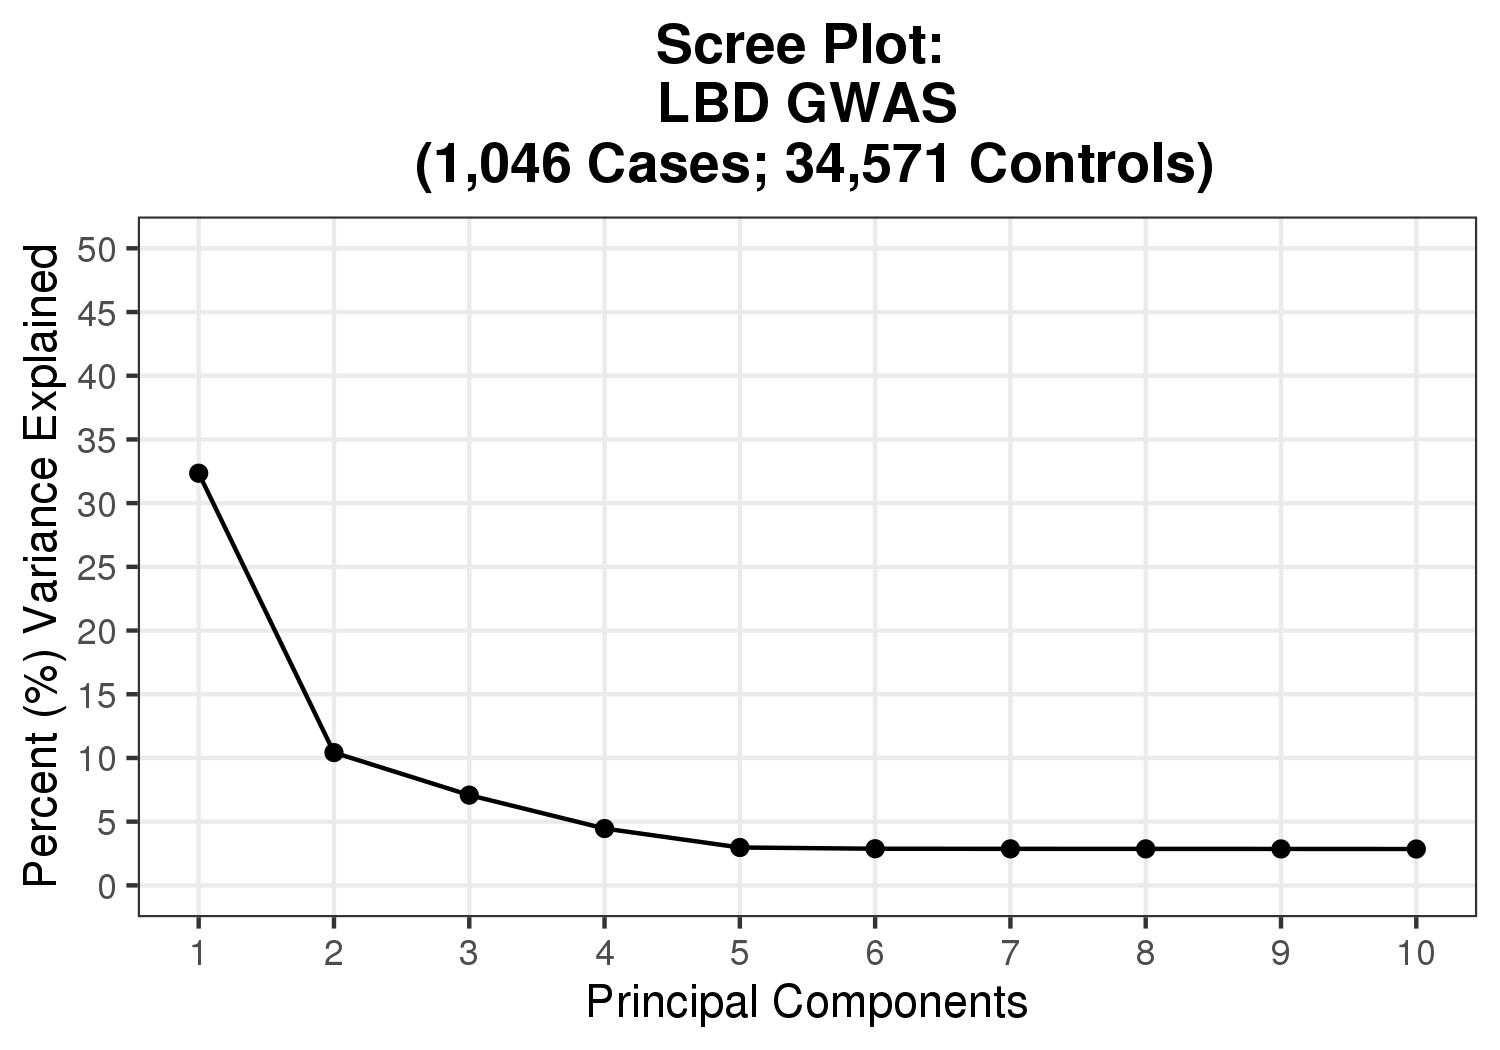

In [10]:
# To display the image made in the R script above
from IPython.display import Image
Image(filename="ScreePlot_LBD_GWAS_R.jpg") 

---
<a id="Py-Plot"></a>
# 6. How to plot in Python with seaborn within the Lab/Notebook

Read in pca.eigenval file from PLINK
Update the column names
Generate the Scree plot


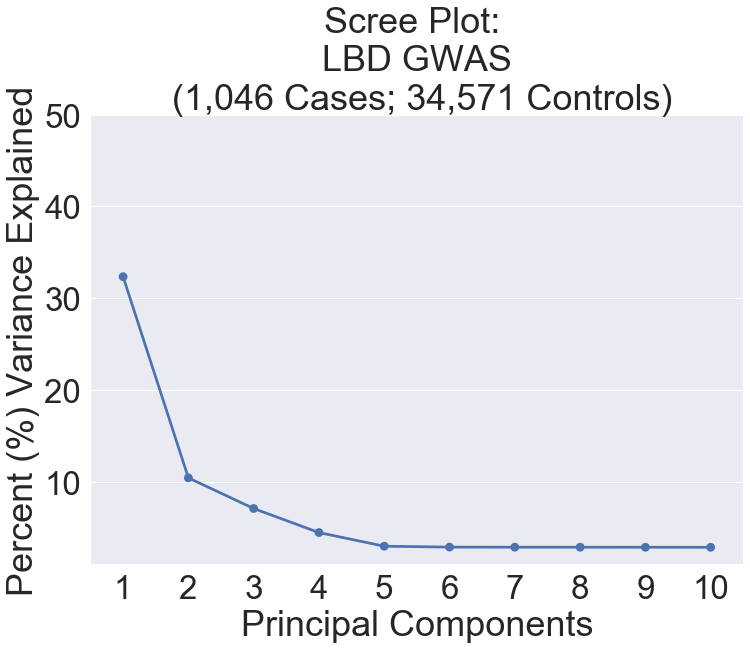

In [11]:
# This script is how to generate the same Scree plot using the seaborn package in Python

# Load the necessary packages 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the PCA Eigenvalues and Eigenvectors 
print("Read in pca.eigenval file from PLINK")
eigenval = pd.read_csv("pcaCovs_LBD.eigenval", header = None)

# Update column names
print("Update the column names")
eigenval.columns = ['Eigenvalues']
eigenval['PC'] = np.arange(1, len(eigenval) + 1)
eigenval['VarianceExplained'] = eigenval['Eigenvalues']/eigenval.Eigenvalues.sum()*100

eigenval2 = eigenval.head(10)

print("Generate the Scree plot")
#plt.style.use('ggplot') 

# Stylistic Plot Requirements  
sns.set_context("poster") # Many other options, this works well within Jupyter
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=3)

# Plotting the plot
scree = sns.pointplot(x = "PC", y = "VarianceExplained", data = eigenval2)
scree.set_title('Scree Plot: \n LBD GWAS \n (1,046 Cases; 34,571 Controls)')
scree.set_ylabel('Percent (%) Variance Explained')
scree.set_xlabel('Principal Components') 
plt.ylim(1, 50) # Force the y-axis scale 

# Save out the figure
scree.figure.savefig("ScreePlot_LBD_GWAS_Python.jpg")

---
<a id="Swarms"></a>
# 7. How to Submit Swarm Files to Biowulf from within the Lab/Notebook

## Biowulf Modules and Swarm Submissions

- User Dashboard: [LINK](https://auth.nih.gov/CertAuthV2/forms/NIHPivOrFormLogin.aspx?TYPE=33554433&REALMOID=06-effe824d-683e-408e-962c-86fed36d3317&GUID=&SMAUTHREASON=0&METHOD=GET&SMAGENTNAME=-SM-aKmoe5cvpd5WMc7bZS8DqazGggT0l50j5WjH2pgUXDKXvzHEQOnbTYJNejNHZ%2bzw&TARGET=-SM-https%3a%2f%2fhpc%2enih%2egov%2fdashboard%2f#)

### Things to Keep in Mind:
- You can load modules like you would in Biowulf, but they are limited to the chunk you are using unless they were specified in your `first.txt` script (output is saved in Notebook)

In [15]:
%%bash

# Load the necessary modules 
module load plink

# For example, you can run basic QC within Jupyter
# For example, call rate 
plink --bfile hapmap1 --mind 0.1 --make-bed --out hapmap1_CR 

PLINK v1.90b4.4 64-bit (21 May 2017)           www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1_CR.log.
Options in effect:
  --bfile hapmap1
  --make-bed
  --mind 0.1
  --out hapmap1_CR

257652 MB RAM detected; reserving 128826 MB for main workspace.
83534 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99441.
83534 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are contro

[-] Unloading plink  1.9.0-beta4.4  on cn3212 
[+] Loading plink  1.9.0-beta4.4  on cn3212 


Let's say for example you want to extract each chromosome out to binary files to use later 

You can do this by
- One by one
- In a loop 
- Running an external script
- In a swarm 

Since we have already discussed loops, I will now discuss running an external script

Say that the external script `subset_by_chr.sh` looks like this...

```bash
#!/bin/env bash

mkdir PLINK_SUBSET

module load plink 

for chromosome in {1..22};
do
    plink --bfile hapmap1_CR --chr ${chromosome} --make-bed --out ./PLINK_SUBSET/CHR${chromosome}_hapmap1_CR 
done
```

You can run it using the following...

In [16]:
%%capture 
%%bash 

# %%capture at the top is to hide output of the cell in case it is really long

# Run the script
sh subset_by_chr.sh

You can also prepare to submit a swarm within Jupyter like the following...

One way is to write a bash script for-looping each chromosome and submit them with sbatch. 
However, using swarm is better because it is more efficient, tracable and controllable. 

I especially like that with swarm, you can explicitly use two cpus on one core, which is twice more efficient! Let's create a swarm file for generating chr1-22.

In [17]:
binary = 'hapmap1_CR'
script = """
    plink --bfile {binary} --chr {chromosome} --make-bed --out ./PLINK_SUBSET/CHR{chromosome}_{binary}"""

with open ('subset_by_chr.swarm', 'w') as f:
    for chromosome in range(1,23):
        f_out = 'chromosome '+str(chromosome)
        f.write(script.format(binary = binary, chromosome = chromosome, 
                              f_out = f_out))
        print(f_out, 'done')

chromosome 1 done
chromosome 2 done
chromosome 3 done
chromosome 4 done
chromosome 5 done
chromosome 6 done
chromosome 7 done
chromosome 8 done
chromosome 9 done
chromosome 10 done
chromosome 11 done
chromosome 12 done
chromosome 13 done
chromosome 14 done
chromosome 15 done
chromosome 16 done
chromosome 17 done
chromosome 18 done
chromosome 19 done
chromosome 20 done
chromosome 21 done
chromosome 22 done


.
## Submitting a Swarm
Before actually submitting a swarm job, it is always good to check how it would go with *--devel* option

In [18]:
!swarm -f subset_by_chr.swarm --module plink --devel

Loading modules plink
22 commands run in 22 subjobs, each command requiring 1.5 gb and 1 thread, allocating 22 cores and 44 cpus
sbatch --array=0-21 --job-name=swarm --output=/gpfs/gsfs9/users/LNG/makariousmb/Seminar_JupyterBiowulf/swarm_%A_%a.o --error=/gpfs/gsfs9/users/LNG/makariousmb/Seminar_JupyterBiowulf/swarm_%A_%a.e --cpus-per-task=1 --mem=1536 --partition=norm --time=02:00:00 /spin1/swarm/makariousmb/j4xTOEFNis/swarm.batch


.
### +++**IMPORTANT**+++

To decide parameters, please go to [User Dashboard](https://hpc.nih.gov/dashboard/). 

It seems that the above command only takes <100M memory, 1 cpu, and 2 min with the current parameters (which there are none)

The job scheduling priority is determined by your past CPU usage (**sum of CPUxTIME**) with a half life of 2 weeks. 

Setting parsimoneous parameters is important to get the job done!


So I set the parameters as, 

1. 2G memory will be more than enough: -g 2
2. Use both cpus for a core : -p 2
3. Give 1 min per job: --time '00:01:00'
4. Bundle 2 subjobs so that each subjob works more than 5 min (for scheduling efficiency): -b 6
5. Designate the output folder "PLINK_SUBSET"
6. Submit job to "quick" node since the running time for the job won't exceed 4 hours

**Looks Good?**

Now submit the job by taking away *--devel*

In [19]:
!swarm -f subset_by_chr.swarm -g 2 -p 2 --time '0:01:00' -b 6 --logdir='PLINK_SUBSET' --partition='quick' --module plink --devel

Loading modules plink
22 commands run in 2 subjobs, each command requiring 2 gb and 1 thread, packing 2 processes per subjob, running 12 processes serially per subjob
sbatch --array=0-1 --job-name=swarm --output=/dev/null --error=/dev/null --cpus-per-task=2 --mem=4096 --partition=quick --time=06:00 /spin1/swarm/makariousmb/TPfXnjCj2a/swarm.batch


In [20]:
!swarm -f subset_by_chr.swarm -g 2 -p 2 --time '0:01:00' -b 6 --logdir='PLINK_SUBSET' --partition='quick' --module plink 

32805606


In [21]:
!jobload -j 32805606

           JOBID            TIME            NODES  CPUS  THREADS   LOAD       MEMORY
                     Elapsed / Wall               Alloc   Active           Used /     Alloc


---
<a id="Bye"></a>
# 8. Take-away Messages

Hopefully, at the conclusion of this seminar you know: 
1. How to use the expect scripts to set up Jupyter within Biowulf
2. You know how to manipulate the expect scripts to open in the preferred directory with the loaded modules 
3. You are aware of some of the other languages you can use within Jupyter and their limitations
4. You can see how to run scientists and statistician's favorite language: R
5. You can also see how some of the more common things done in R look like in Python
6. What ggplot looks like within Jupyter
7. How to create similar plots in Python
8. How to submit swarm file 

Any questions/comments? Please email me at mary.makarious@nih.gov

**Please remember to fill out the survey! :)** 

#### Future Talks: 
- **09/19:** Tracing Tools for Neuronal Circuit Mapping
- **10/11:** Neurodegenerative Diseases (Clinic, Pathology, Genetics) 
- **10/25:** ImageJ - Organelle Dynamics and Cell Morphology Analysis 

**Would you like to see other talks?** (ex. GitHub introduction, How to Run a GWAS, etc.) please email chiarp@nih.gov with suggestions of what you would like to see or present!